In [3]:
import numpy as np
from sklearn import datasets

np.random.seed(42)

### Dataset preparation

In [4]:
# Load Dataset with first 2 Features
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
print(x.shape)
print(y.shape)

# Dataset variables
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = 3
test_size = 20
train_size = num_samples - test_size

# Split Data in Train and Testset
indices = np.random.permutation(num_samples)
x_train = x[indices[:-test_size]]
y_train = y[indices[:-test_size]]

x_test = x[indices[-test_size:]]
y_test = y[indices[-test_size:]]

(150, 2)
(150,)


In [5]:
# Training Size
print(f"X train shape: {x_train.shape}")
print(f"y train shape: {y_train.shape}")

# Testing Size
print(f"X test shape: {x_test.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (130, 2)
y train shape: (130,)
X test shape: (20, 2)
y test shape: (20,)


### KNN SKlearn Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [i for i in range(1, 11)] # [1, 2, ...., 10]
weights = ["uniform", "distance"]

# 10 x 2 = 20 Modelle
for neighbor in neighbors:
    for weight in weights:
        knn = KNeighborsClassifier(n_neighbors=neighbor, weights=weight)
        knn.fit(x_train, y_train)
        score = knn.score(x_test, y_test)
        print(f"Neighbors:{neighbor}\tWeight: {weight} \tScore: {score}")

Neighbors:1	Weight: uniform 	Score: 0.65
Neighbors:1	Weight: distance 	Score: 0.65
Neighbors:2	Weight: uniform 	Score: 0.65
Neighbors:2	Weight: distance 	Score: 0.65
Neighbors:3	Weight: uniform 	Score: 0.7
Neighbors:3	Weight: distance 	Score: 0.7
Neighbors:4	Weight: uniform 	Score: 0.65
Neighbors:4	Weight: distance 	Score: 0.7
Neighbors:5	Weight: uniform 	Score: 0.7
Neighbors:5	Weight: distance 	Score: 0.7
Neighbors:6	Weight: uniform 	Score: 0.7
Neighbors:6	Weight: distance 	Score: 0.7
Neighbors:7	Weight: uniform 	Score: 0.6
Neighbors:7	Weight: distance 	Score: 0.65
Neighbors:8	Weight: uniform 	Score: 0.65
Neighbors:8	Weight: distance 	Score: 0.65
Neighbors:9	Weight: uniform 	Score: 0.7
Neighbors:9	Weight: distance 	Score: 0.65
Neighbors:10	Weight: uniform 	Score: 0.7
Neighbors:10	Weight: distance 	Score: 0.65


### Best KNN Setup

In [7]:
best_neighbor = 3
best_weight = "uniform"

knn = KNeighborsClassifier(
    n_neighbors=best_neighbor,
    weights=best_weight
)
knn.fit(X=x_train, y=y_train)

y_pred = knn.predict(X=x_test)
y_pred_prob = knn.predict_proba(X=x_test)

print("Predictions vs. Classes:")
print(f"Pred: {y_pred}")
print(f"Class: {y_test}")
print(f"Prediction Probs:\n{y_pred_prob}")

Predictions vs. Classes:
Pred: [2 2 0 1 0 2 2 2 1 2 1 2 1 1 0 1 1 0 1 2]
Class: [2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
Prediction Probs:
[[0.         0.33333333 0.66666667]
 [0.         0.33333333 0.66666667]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]
 [0.         1.         0.        ]
 [0.         0.66666667 0.33333333]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.33333333 0.66666667]]


In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])

def make_meshgrid(x, y):
    x = np.arange(x.min()-1, x.max()+1, 0.01)
    y = np.arange(y.min()-1, y.max()+1, 0.01)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, **params)

def plot_knn(x_train, y_train, x_test, y_test):
    colors = ["red", "blue", "green"]
    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, knn, xx, yy, cmap=cmap_light, alpha=0.5)
    for index, point in enumerate(x_train):
        plt.scatter(
            point[0],
            point[1],
            color=colors[y_train[index]],
            marker="o",
            s=20.0
        )
    for index, point in enumerate(x_test):
        plt.scatter(
            point[0],
            point[1],
            color=colors[y_test[index]],
            marker="*",
            s=20.0
        )
    plt.show()

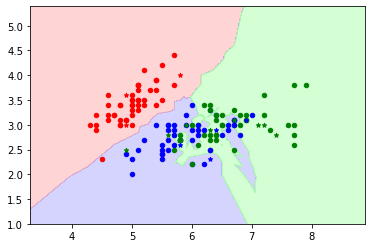

In [9]:
plot_knn(x_train, y_train, x_test, y_test)